Archivo cargado exitosamente.
Primeras filas del dataset:
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission Owner;;;;;;;;  
0      Dealer       Manual     0;;;;;;;;  
1      Dealer       Manual     0;;;;;;;;  
2      Dealer       Manual     0;;;;;;;;  
3      Dealer       Manual     0;;;;;;;;  
4      Dealer       Manual     0;;;;;;;;  

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-nul

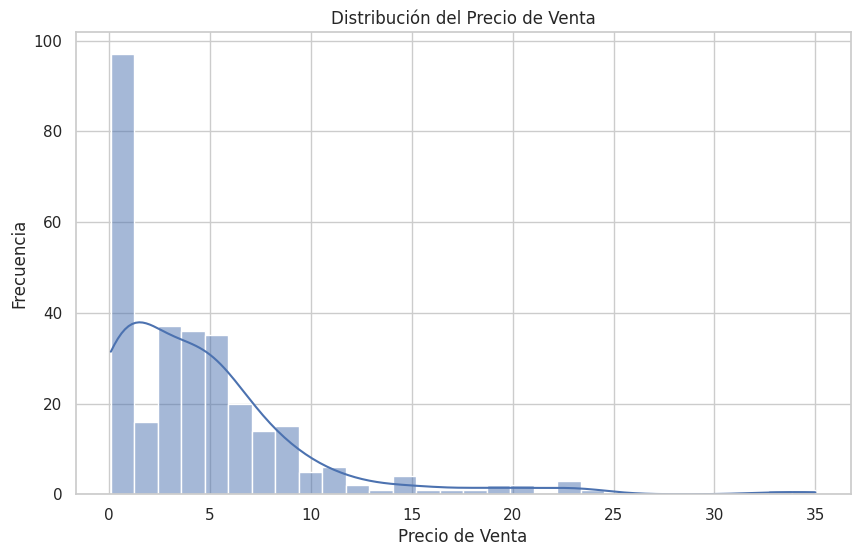

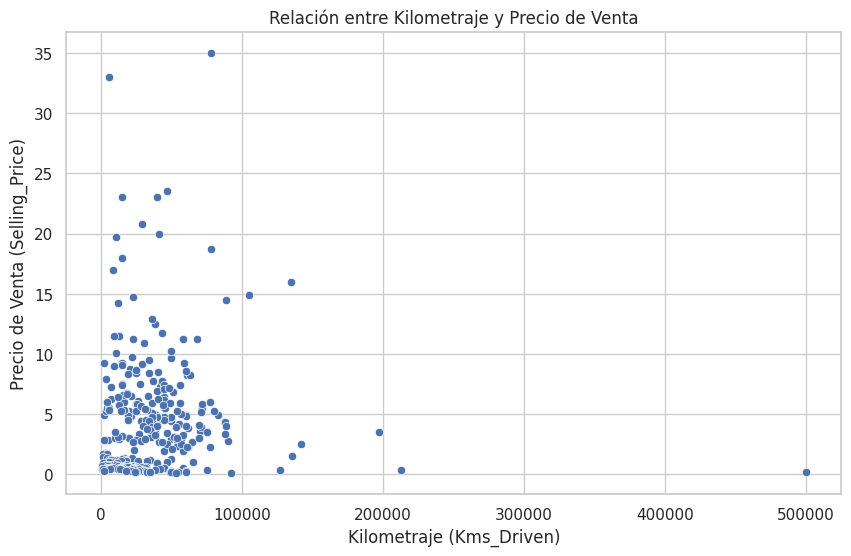

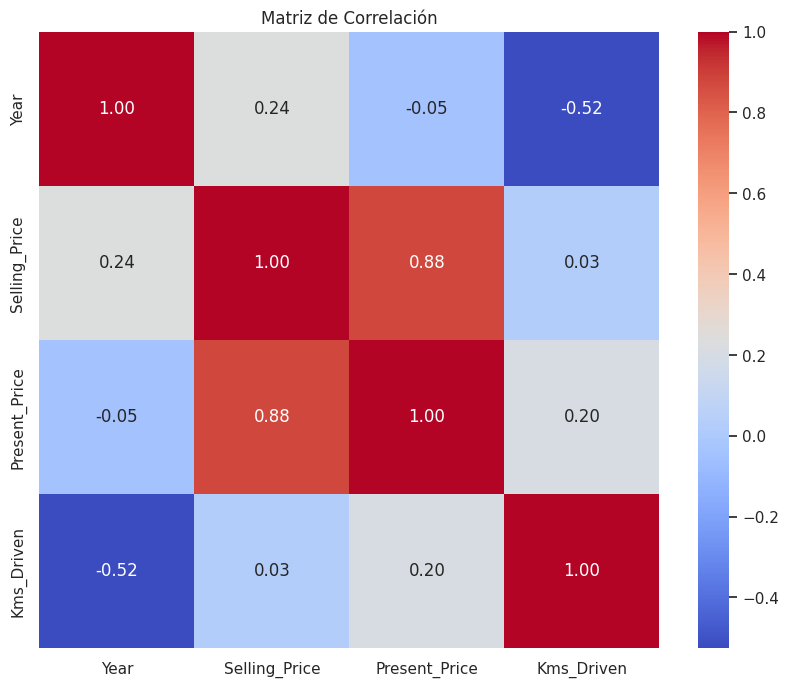

Matriz de Correlación:
                    Year  Selling_Price  Present_Price  Kms_Driven
Year           1.000000       0.236141      -0.047584   -0.524342
Selling_Price  0.236141       1.000000       0.878983    0.029187
Present_Price -0.047584       0.878983       1.000000    0.203647
Kms_Driven    -0.524342       0.029187       0.203647    1.000000

Variables con correlación alta con 'Selling_Price':
Index(['Selling_Price', 'Present_Price'], dtype='object')
Valores faltantes antes de la limpieza:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner;;;;;;;;    0
dtype: int64

Valores faltantes después de la limpieza:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner;;;;;;;;    0
dtype: int64

Datos después de la codificación One-Hot:

  Car_Name  Year  Selling_Price  Present

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=1. All the features will be returned.
  warnings.warn(


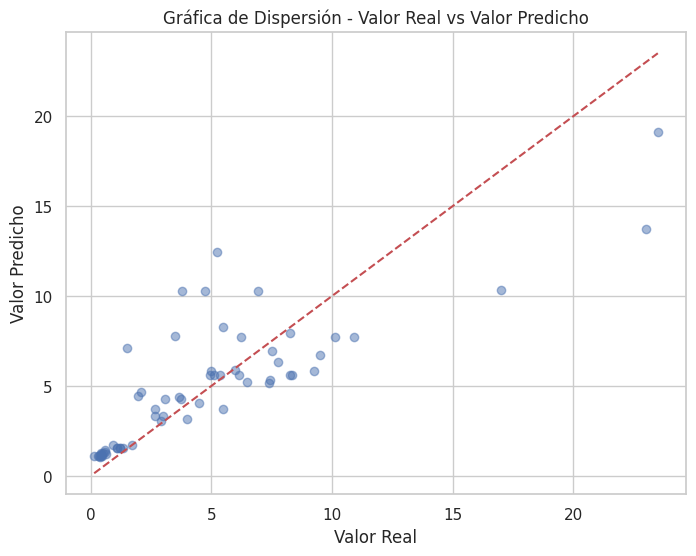

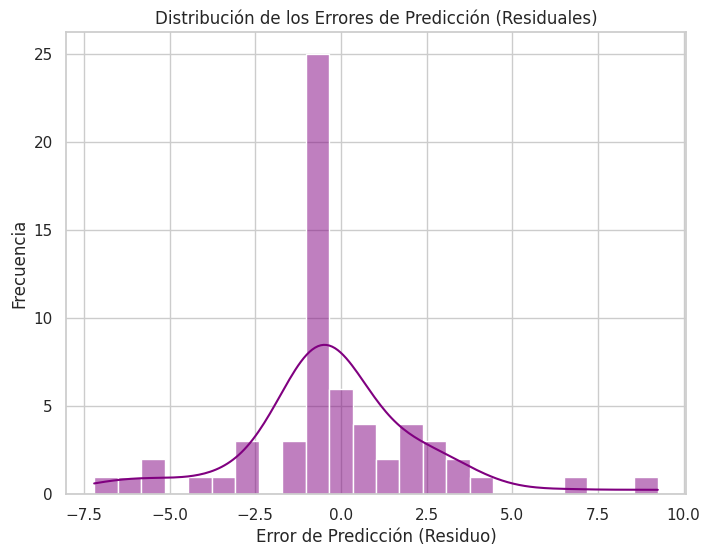

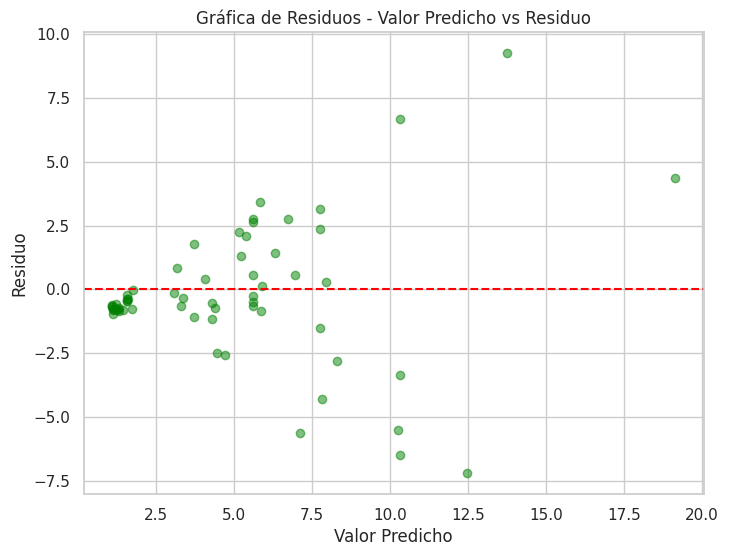

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Owner;;;;;;;;_1;;;;;;;;',
       'Owner;;;;;;;;_3;;;;;;;;'],
      dtype='object')
Nombres de columnas después de los cambios:
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Owner;;;;;;;;_1;;;;;;;;',
       'Owner;;;;;;;;_3;;;;;;;;'],
      dtype='object')


In [62]:
# Paso 1:
# Paso 1.1: Importar librerías necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Configuración opcional para mejorar visualizaciones:
%matplotlib inline
sns.set(style="whitegrid")

# Paso 1.2: Cargar el archivo CSV directamente desde la raíz de Colab:
df = pd.read_csv('CarData.csv')
print("Archivo cargado exitosamente.")

# Paso 1.3: Mostrar las primeras filas para verificar la carga de datos:
print("Primeras filas del dataset:\n", df.head())

# Paso 1.4: Información general sobre el dataset:
print("\nInformación del dataset:\n")
df.info()

# Paso 1.5: Estadísticas descriptivas del dataset:
print("\nEstadísticas descriptivas:\n", df.describe())

# Paso 1.6: Verificar valores faltantes en el dataset:
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Paso 1.7: Distribución de la variable dependiente (precio de venta o 'selling_price'):
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

# Paso 1.8: Visualización de la relación entre el precio de venta y una variable independiente (por ejemplo, 'km_driven'):
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title("Relación entre Kilometraje y Precio de Venta")
plt.xlabel("Kilometraje (Kms_Driven)")
plt.ylabel("Precio de Venta (Selling_Price)")
plt.show()


# Paso 1.9: Matriz de correlación para identificar relaciones entre variables

# Crear una figura para el heatmap
plt.figure(figsize=(10, 8))

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Crear el heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación para visualizar los valores en formato de tabla
print("Matriz de Correlación:\n", correlation_matrix)

# Paso 1.10: Seleccionar variables con alta correlación con el precio de venta para la regresión lineal simple:
# Buscamos la variable con mayor correlación con 'selling_price', para usar en una regresión simple:
cor_target = abs(correlation_matrix['Selling_Price'])
relevant_features = cor_target[cor_target > 0.5].index
print("\nVariables con correlación alta con 'Selling_Price':")
print(relevant_features)
# Selecciona aquellas con correlación > 0.5



# Paso 2:
# Paso 2.1: Verificar nuevamente la existencia de valores faltantes:
print("Valores faltantes antes de la limpieza:")
print(df.isnull().sum())

# Paso 2.2: Llenar o eliminar valores faltantes (si existen):
# En este caso, asumimos que los valores nulos en ciertas columnas numéricas serán reemplazados con la mediana:
# y los valores nulos en columnas categóricas serán reemplazados con el valor más frecuente.

# Reemplazo en columnas numéricas (por ejemplo, si 'km_driven' tuviera valores faltantes):
if df['Kms_Driven'].isnull().sum() > 0:
    df['Kms_Driven'].fillna(df['Kms_Driven'].median(), inplace=True)

# Reemplazo en columnas categóricas (por ejemplo, si 'fuel' tuviera valores faltantes):
# Reemplazo en columnas categóricas con los nombres exactos que aparecen en el archivo
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner;;;;;;;;']
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Rellenamos con el valor más frecuente

print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())

# Paso 2.3: Transformación de datos categóricos:
# Convertimos columnas categóricas en variables numéricas utilizando One-Hot Encoding:

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nDatos después de la codificación One-Hot:\n")
print(df.head())

# Paso 2.4: Verificación de tipos de datos y ajuste si es necesario:
# Verificamos que todas las columnas estén en el tipo adecuado:
print("\nTipos de datos después del preprocesamiento:\n")
print(df.dtypes)

# Paso 2.5: Escalado de características numéricas:
# Escalar las variables numéricas como 'km_driven' para mejorar el rendimiento del modelo:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Kms_Driven', 'Year']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# Ajustamos solo las columnas numéricas relevantes

print("\nPrimeras filas después del escalado:\n")
print(df.head())



# Paso 3:

# Paso 3.1: Cálculo de la correlación de cada característica con el precio de venta:
# Primero seleccionamos solo las columnas numéricas.
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Verificamos si 'Selling_Price' está en las columnas numéricas
if 'Selling_Price' in numerical_df.columns:

    # Calculamos la matriz de correlación con solo las columnas numéricas
    correlation_matrix = numerical_df.corr()

    # Calculamos la correlación de cada característica con 'Selling_Price'
    cor_target = abs(correlation_matrix['Selling_Price'])
    relevant_features = cor_target[cor_target > 0.3].index

    print("Características con alta correlación con 'Selling_Price':\n", relevant_features)
else:
    print("La columna 'Selling_Price' no está en las columnas numéricas. Verifica el nombre o tipo de datos.")


# Paso 3.2: Filtrar el dataset para incluir solo las características relevantes:
df_relevant = df[relevant_features]

# Paso 3.3: Selección de características usando SelectKBest:
# Usamos una selección de características basada en estadísticas para validar las características importantes:

from sklearn.feature_selection import SelectKBest, f_regression

X = df_relevant.drop('Selling_Price', axis=1)
y = df_relevant['Selling_Price']
# Variables predictoras; # Variable objetivo

# Seleccionamos las 5 mejores características en relación con el precio de venta:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

# Identificamos las mejores características y mostramos sus puntajes:
selected_features = X.columns[selector.get_support()]
print("\nMejores características seleccionadas:\n", selected_features)

# Paso 3.4: Crear un nuevo DataFrame con solo las características seleccionadas:
df_selected_features = df_relevant[selected_features]
df_selected_features['Selling_Price'] = y

print("\nDataset final con las características seleccionadas:\n")
print(df_selected_features.head())



# Paso 4:

# Paso 4.1: Importar la función de división de sklearn:
from sklearn.model_selection import train_test_split

# Paso 4.2: Definir las variables predictoras (X) y la variable objetivo (y):
X = df_selected_features.drop('Selling_Price', axis=1)
y = df_selected_features['Selling_Price']
# Características seleccionadas; # Precio de venta (variable objetivo)

# Paso 4.3: Realizar la división de los datos en 80% entrenamiento y 20% prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4.4: Verificar las dimensiones de los conjuntos de Train y Test:
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (y_test):", y_test.shape)



# Paso 5:

# Paso 5.1: Importar el modelo de regresión lineal de sklearn:
from sklearn.linear_model import LinearRegression

# Paso 5.2: Inicializar el modelo de regresión lineal:
model = LinearRegression()

# Paso 5.3: Entrenar el modelo usando el conjunto de entrenamiento:
model.fit(X_train, y_train)

# Paso 5.4: Mostrar los coeficientes y la intercepción del modelo:
print("Coeficientes del modelo:", model.coef_)
print("Intercepción del modelo:", model.intercept_)



# Paso 6:

# Paso 6.1: Importar las métricas de evaluación de regresión de sklearn:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paso 6.2: Realizar predicciones en el conjunto de prueba:
y_pred = model.predict(X_test)

# Paso 6.3: Calcular las métricas de desempeño:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Paso 6.4: Mostrar los resultados de las métricas:
print("Desempeño del modelo en el conjunto de prueba:")
print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)



# Paso 7:

# Paso 7.1: Importar librerías adicionales para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración opcional para mejorar las visualizaciones
%matplotlib inline
sns.set(style="whitegrid")

# Paso 7.2: Gráfica de dispersión de valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Gráfica de Dispersión - Valor Real vs Valor Predicho')
plt.show()
# Línea ideal

# Paso 7.3: Histograma de errores (residuales):
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Error de Predicción (Residuo)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (Residuales)')
plt.show()

# Paso 7.4: Gráfica de residuos vs valores predichos:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valor Predicho')
plt.ylabel('Residuo')
plt.title('Gráfica de Residuos - Valor Predicho vs Residuo')
plt.show()
# Línea en y=0



# Mostrar los nombres exactos de todas las columnas
print(df.columns)


# Renombrar la columna 'Owner;;;;;;;;' a 'Owner'.
# Lo renombre con el siguiente comando, pero no se ejecuto el cambio. Porque siguio con el mismo nombre.
if 'Owner;;;;;;;;' in df.columns:
    df.rename(columns={'Owner;;;;;;;;': 'Owner'}, inplace=True)

print("Nombres de columnas después de los cambios:\n", df.columns)



